<style> .section-title {background-color: #2ecc71; color: white; border-radius: 15px; text-align: center; padding: 1px; font-size: 2em}</style>
<div class="section-title">Goal of Project</div>

Goal of the project is to develop a machine learning model that detects the early occurence of diabetes. 

Diabetes is a chronic metabolic disease in which too much sugar circulates in the blood. The increased blood sugar level damages blood vessels and various organs. Around 425 million people worldwide suffer from diabetes. The main factors known to date are heredity, an unhealthy lifestyle and lack of exercise.

The project focuses on the investigation in adult women. The plan of the project includes the following steps:  

•	**Data peparation**: Analysis of the data set provided.  
•	**Model selection and training**: Selection of different machine learning algorithms.   
•	**Model evaluation**: Evaluation of the model using various metrics to assess effectiveness.


In [505]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import joblib  
from sklearn import neighbors
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold, StratifiedKFold, cross_validate
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score

<style> .section-title {background-color: #2ecc71; color: white; border-radius: 15px; text-align: center; padding: 1px; font-size: 2em}</style>
<div class="section-title">The Data</div>

Source: https://www.kaggle.com/datasets/mathchi/diabetes-data-set

The data set contains the following features:  
•	**pregnancies**: Number of pregnancies  
•	**Glucose**: The patient's blood glucose level (mg/dl)  
•	**Blood pressure**:  The patient's blood pressurec (mmHg)  
•	**Skin Thickness**: The patient's skin thickness (mm)  
•	**Insulin**: The patient's insulin level (muU/ml)  
•	**Diabetes Pedigree Function**: Estimated genetic diabetes risk factor based on the patient's pedigree  
•	**Age**: Age of the patient  

Target:  
•	**Outcome**: Evaluation of whether or not the patient has diabetes. “1” stands for having diabetes and “0” stands for not having it.

In [470]:
# Liest die Daten ein und zeigt sie an
df = pd.read_csv('diabetes.csv')
display(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<style> .section-title {background-color: #2ecc71; color: white; border-radius: 15px; text-align: center; padding: 1px; font-size: 2em}</style>
<div class="section-title">Initial Data Analysis</div>

For the initial data analysis  
- the number of rows and columns was determined and printed out in order to obtain an overview of the size of the data set.      
- A histogram was used to graphically display the distribution of the features.   
- A correlation matrix was created to examine the relationships between the features. As expected, the correlation matrix shows the greatest relationship to the outcome for the features: glucose, BMI and age.   
- Finally, the distribution of the outcome (positive/negative) was displayed in a bar chart to visualize the ration of the two classes.

Anzahl der Zeilen und Spalten:  (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


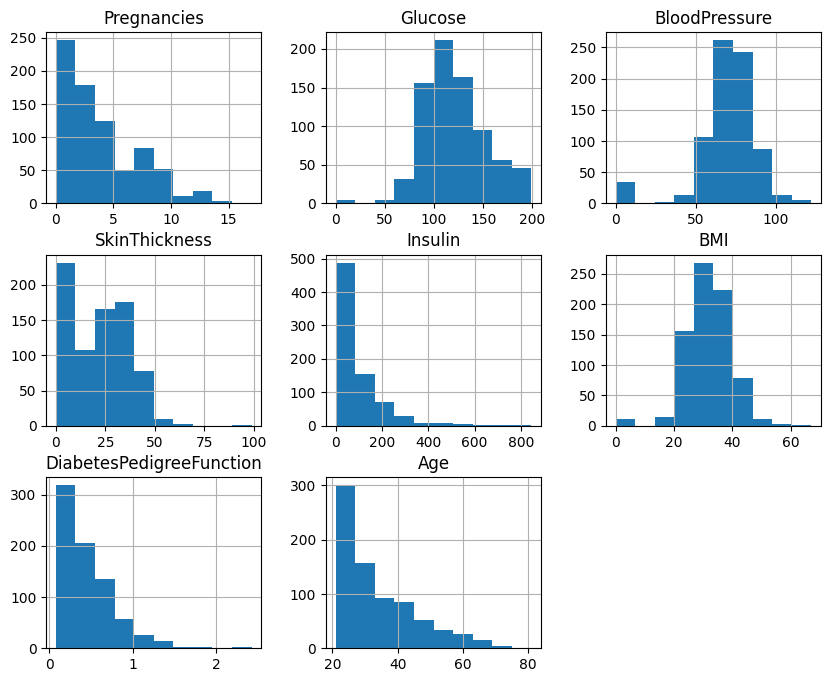

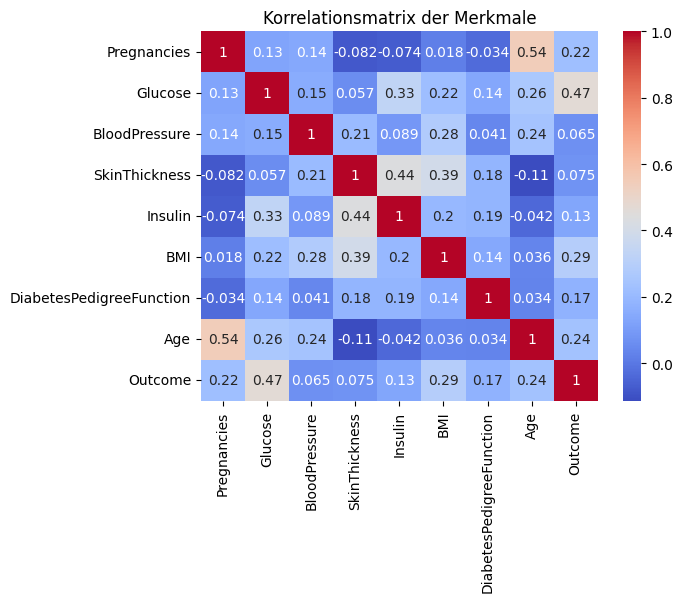

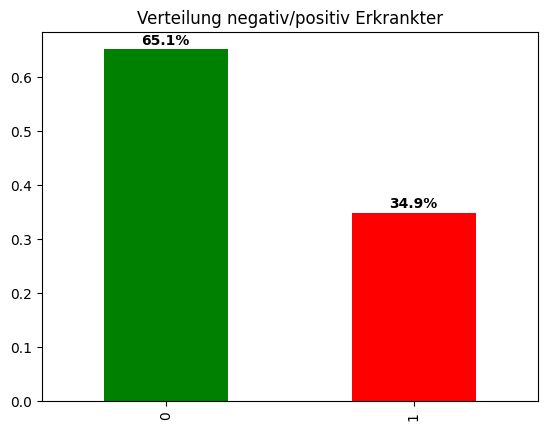

In [471]:
# Zeige die Anzahl der Zeilen und Spalten an
print("Anzahl der Zeilen und Spalten: ", df.shape)

# Zeige statistische Kennzahlen für jedes Merkmal an
features = df.columns[:-1]
display(df[features].describe())

# Zeig die Verteilung der Merkmale an
df[features].hist(figsize=(10,8))
plt.show()

# Erstelle eine Heatmap der Korrelationsmatrix
korrelationsmatrix = df.corr()
sns.heatmap(korrelationsmatrix, annot=True, cmap='coolwarm')
plt.title('Korrelationsmatrix der Merkmale')
plt.show()

# Zeigt die Verteilung der Auswertung an
Auswertung = df['Outcome'].value_counts(normalize=True).plot(kind='bar', color=['green', 'red'], # bestimmt plotart und Farbe
                                                title='Verteilung negativ/positiv Erkrankter') # bestimmt den Titel des Diagramms

for i, count in enumerate(Auswertung.patches): # Anzeige der Prozentwerte
     plt.text(count.get_x() + count.get_width() / 2, count.get_height() + 0.01,  # bestimmt die Position der Prozentwerte
              f"{round(count.get_height() * 100, 2)}%", ha='center', color='black', fontweight='bold') # bestimmt die Farbe und die Schriftart der Prozentwerte
     

<style> .section-title {background-color: #2ecc71; color: white; border-radius: 15px; text-align: center; padding: 1px; font-size: 2em}</style>
<div class="section-title">Explorative Data Analysis</div>

- In the exploratory data analysis, the data set was analyzed to identify missing and duplicated values.   
- Conspicuous zero values were identified in insulin and skin thickness, which accounted for a considerable amount. In addition, unusual zero values were identified in the BMI, glucose and blood pressure features. In order to consider all features for the experiment and to improve the statistical properties, the zero values in the corresponding features were replaced by the average. This led to a better distribution of the data.  

In [472]:
# identifiziere fehlende Werte
print("Anzahl fehlender Werte im Datensatz: ",  df.isnull().sum())

# identifiziere Duplizierte Werte
print("Anzahl duplizierter Werte im Datensatz: ", df.duplicated().sum())

# zeige an wie viele Werte 0 sind für die Merkmale Insulin und SkinThickness
print("Anzahl der 0-Werte für das Merkmal Insulin: ", df[df['Insulin'] == 0].shape[0])
print("Anzahl der 0-Werte für das Merkmal SkinThickness: ", df[df['SkinThickness'] == 0].shape[0])

Anzahl fehlender Werte im Datensatz:  Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Anzahl duplizierter Werte im Datensatz:  0
Anzahl der 0-Werte für das Merkmal Insulin:  374
Anzahl der 0-Werte für das Merkmal SkinThickness:  227


#### Adjusting the zero values of the characteristics Insulin, SkinThickness, BMI, BloodPressure and Glucose to improve statistical properties

In [473]:
# Ersetzt Nullwerte durch den Mittelwert
def replace_zero(feature):
    mean = df[feature].mean()
    df[feature] = df[feature].replace(0, mean)

# wendet die Funktion auf die Merkmale an
replace_zero('Insulin'),replace_zero('SkinThickness'), replace_zero('BMI'), replace_zero('BloodPressure'), replace_zero('Glucose')

(None, None, None, None, None)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


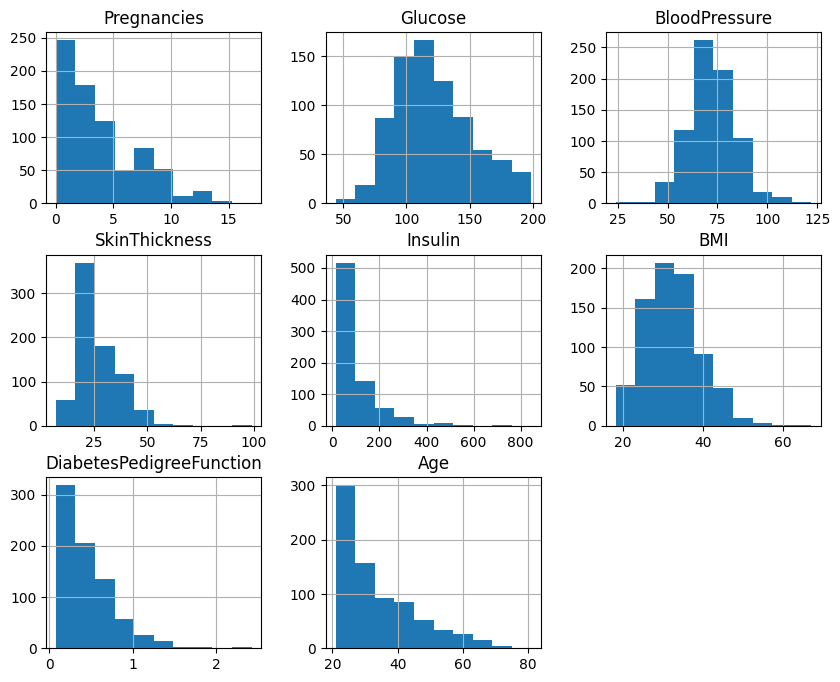

In [474]:
# Zeigt die statistischen Kennzahlen für jedes Merkmal an
display(df[features].describe())

# Zeigt die Verteilung der Merkmale in einem Histogramm an
df[features].hist(figsize=(10,8))
plt.show()

In [475]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 
        'SkinThickness', 'DiabetesPedigreeFunction', 'Age', 'BMI', 'Insulin']] # Definiert die Merkmale
y = df['Outcome'] # Definiert die Zielvariable

<style> .section-title {background-color: #2ecc71; color: white; border-radius: 15px; text-align: center; padding: 1px; font-size: 2em}</style>
<div class="section-title">ML- Models</div>

## Baseline

A baseline was created in order to obtain preliminary results.  
- For this purpose, the data set was divided into training and test data.     
- The “uniform” dummy classifier was used as the baseline model, which generates random predictions according to the class distribution.

The main metric used throughout the experiment is the **F1_score**. The F1_score is the balance between precision (accurate prediction of the positive class) and recall (detection of all positive instances). 


In [476]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, # bestimmt Anteil der Testdaten
                                                    shuffle=True,   # mischt die Daten vor der Aufteilung
                                                    stratify=y, # behält die Verteilung der Klassen bei
                                                    random_state=29) # legt den Zufallsgenerator fest

# Skalierung der Daten mit StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Skalierung der Trainingsdaten
X_test_scaled = scaler.transform(X_test) # Skalierung der Testdaten

### Dummy Classifier

In [477]:
# Erstellt einen Dummy-Klassifikator mit zufälliger Vorhersage
dummy_clf = DummyClassifier(strategy="uniform")

# Trainiere den Dummy-Klassifikator
dummy_clf.fit(X_train_scaled, y_train) 
y_pred = dummy_clf.predict(X_test_scaled) 

# Bewertung der Vorhersagegenauigkeit
F1_score = f1_score(y_test, y_pred) * 100
Precision = precision_score(y_test, y_pred) * 100
Recall = recall_score(y_test, y_pred)  * 100

# Erstellt eine Tabelle mit den Ergebnissen
Ergebnisse = {'Metric': ['F1_score', 'Precision', 'Recall'], # bestimmt die Merkmale
    'Dummy Classifier': [F1_score, Precision, Recall]} # bestimmt die Werte

Ergebnisse = pd.DataFrame(Ergebnisse) 
Ergebnisse['Dummy Classifier'] = Ergebnisse['Dummy Classifier'].apply(lambda x: '{:.2f}%'.format(x)) # bestimmt die Formatierung der Werte
display(Ergebnisse)

,Metric,Dummy Classifier
0,F1_score,41.67%
1,Precision,33.33%
2,Recall,55.56%


### kNearestNeighbour

In [508]:
# Funktion zur Berechnung des F1-Scores
def get_f1(X_train_scaled, X_test_scaled, y_train, y_test, k, voting, metric):
    kNN = neighbors.KNeighborsClassifier(k, #nearest neighbors to be considered
                                         weights = voting, #decision rule | distance
                                         metric = metric, #distance function
                                         algorithm = "brute") #compute all distances
    
    kNN.fit(X_train_scaled,  y_train) # trainiert den Klassifikator
    y_test_pred = kNN.predict(X_test_scaled) # macht eine Vorhersage für die Testdaten
    F1_score = metrics.f1_score(y_test, y_test_pred) # berechnet den F1-Score

    return F1_score

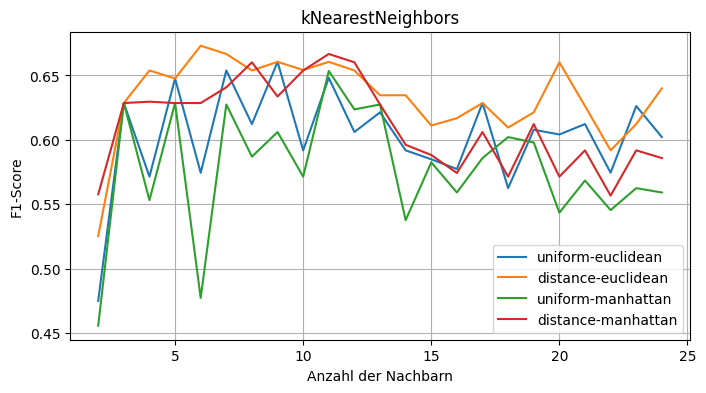

In [479]:
# Funktion zur Darstellung der F1-Scores für verschiedene k
def plot_kNN():
    # Erstellt leere Listen für die F1-Scores
    uniform_euclidean_f1 = [] 
    distance_euclidean_f1 = [] 
    uniform_manhattan_f1 = [] 
    distance_manhattan_f1 = [] 
    
    for k in range(2, 25): #loop from one through ten
        uniform_euclidean_f1.append(get_f1(X_train_scaled, X_test_scaled, y_train, y_test, k, "uniform", "euclidean")) # wendet die Funktion auf die Merkmale an
        distance_euclidean_f1.append(get_f1(X_train_scaled, X_test_scaled, y_train, y_test, k, "distance", "euclidean")) # wendet die Funktion auf die Merkmale an
        uniform_manhattan_f1.append(get_f1(X_train_scaled, X_test_scaled, y_train, y_test, k, "uniform", "manhattan")) # wendet die Funktion auf die Merkmale an
        distance_manhattan_f1.append(get_f1(X_train_scaled, X_test_scaled, y_train, y_test, k, "distance", "manhattan")) # wendet die Funktion auf die Merkmale an

    plt.plot(range(2,25), uniform_euclidean_f1, label = "uniform-euclidean") # erstellt ein Liniendiagramm für entsprechende Werte
    plt.plot(range(2,25), distance_euclidean_f1, label = "distance-euclidean") # erstellt ein Liniendiagramm für entsprechende Werte
    plt.plot(range(2,25), uniform_manhattan_f1, label = "uniform-manhattan") # erstellt ein Liniendiagramm für entsprechende Werte
    plt.plot(range(2,25), distance_manhattan_f1, label = "distance-manhattan") # erstellt ein Liniendiagramm für entsprechende Werte
    plt.legend(); #plot the legend

    return

plt.figure(figsize=(8, 4))
plt.title("kNearestNeighbors")
plt.xlabel("Anzahl der Nachbarn")
plt.ylabel("F1-Score")
plt.grid(True)
plot_kNN()

### Decision Tree (max depth)

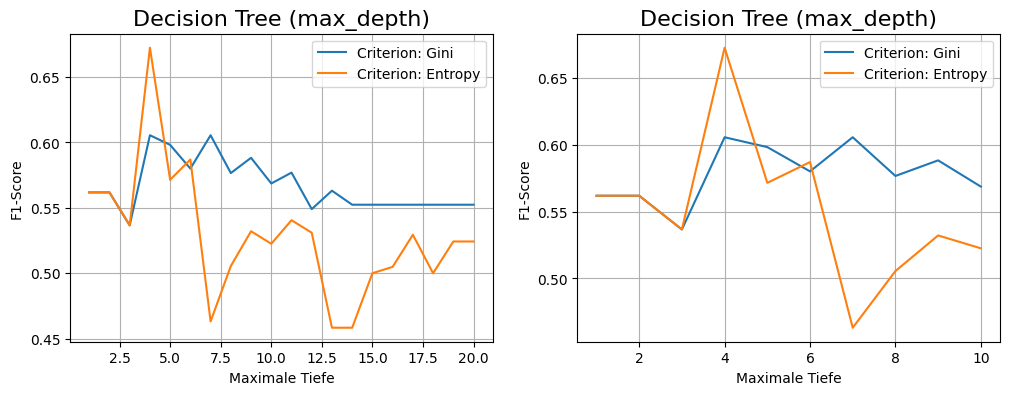

In [507]:
# Definiert Bereich für die maximale Tiefe des Decision Trees
max_depths = range(1, 21)
max_depths_2 = range(1, 11,1)

# Erstellt leere Arrays für die F1-Scores
f1_scores_gini = []
f1_scores_entropy = []
f1_scores_gini_2 = []
f1_scores_entropy_2 = []

# Schleife für die Berechnung der F1-Scores
for depth in max_depths:

    # Erstellt ein Decision Tree-Modell mit dem aktuellen max_depth-Wert und criterion='gini'
    dt_model_gini = DecisionTreeClassifier(max_depth=depth, criterion='gini', random_state=29)

    dt_model_gini.fit(X_train_scaled, y_train)                                # trainiert das Modell
    y_pred_gini = dt_model_gini.predict(X_test_scaled)                        # macht eine Vorhersage für die Testdaten
    f1_gini = f1_score(y_test, y_pred_gini)                                   # berechnet den F1-Score
    f1_scores_gini.append(f1_gini)                                            # fügt den F1-Score dem Array hinzu


    # Erstellt ein Decision Tree-Modell mit dem aktuellen max_depth-Wert und criterion='entropy'
    dt_model_entropy = DecisionTreeClassifier(max_depth=depth, criterion='entropy', 
                                              random_state=29)
    
    dt_model_entropy.fit(X_train_scaled, y_train)
    y_pred_entropy = dt_model_entropy.predict(X_test_scaled)
    f1_entropy = f1_score(y_test, y_pred_entropy)
    f1_scores_entropy.append(f1_entropy)


# Schleife für zweiten Plot, um Auswirkung der Tiefe im Detail zu betrachten
for depth in max_depths_2:
    # Erstelle ein Decision Tree-Modell mit dem aktuellen max_depth-Wert und criterion='gini' für den zweiten Plot
    dt_model_gini_2 = DecisionTreeClassifier(max_depth=depth, criterion='gini', random_state=29)
    
    dt_model_gini_2.fit(X_train_scaled, y_train)
    y_pred_gini_2 = dt_model_gini_2.predict(X_test_scaled)
    f1_gini_2 = f1_score(y_test, y_pred_gini_2)
    f1_scores_gini_2.append(f1_gini_2)


    # Erstelle ein Decision Tree-Modell mit dem aktuellen max_depth-Wert und criterion='entropy' für den zweiten Plot
    dt_model_entropy_2 = DecisionTreeClassifier(max_depth=depth, criterion='entropy', random_state=29)

    dt_model_entropy_2.fit(X_train_scaled, y_train)
    y_pred_entropy_2 = dt_model_entropy_2.predict(X_test_scaled)
    f1_entropy_2 = f1_score(y_test, y_pred_entropy_2)
    f1_scores_entropy_2.append(f1_entropy_2)


# Plot der F1-Scores
plt.figure(figsize=(12, 4))

# Erster Plot: Decision Tree mit Range (1, 20)
plt.subplot(1, 2, 1)                                                # 1 Zeile, 2 Spalte, 1. Plot
plt.plot(max_depths, f1_scores_gini, label='Criterion: Gini')       # erstellt ein Liniendiagramm für entsprechende Werte für Gini
plt.plot(max_depths, f1_scores_entropy, label='Criterion: Entropy') # erstellt ein Liniendiagramm für entsprechende Werte für Entropy
plt.xlabel('Maximale Tiefe')                                        # Beschriftung der x-Achse
plt.ylabel('F1-Score')                                              # Beschriftung der y-Achse
plt.title('Decision Tree (max_depth)' , fontsize=16)                # Titel des Plots
plt.legend()                                                        # Plot der Legende
plt.grid(True)                                                      # Plot des Gitters

# Zweiter Plot: Decision Tree mit Range (1, 10)
plt.subplot(1, 2, 2)
plt.plot(max_depths_2, f1_scores_gini_2, label='Criterion: Gini')
plt.plot(max_depths_2, f1_scores_entropy_2, label='Criterion: Entropy')
plt.xlabel('Maximale Tiefe')
plt.ylabel('F1-Score')
plt.title('Decision Tree (max_depth)', fontsize=16)
plt.legend()
plt.grid(True)

plt.show()

### Decision Tree (ccp-alpha)

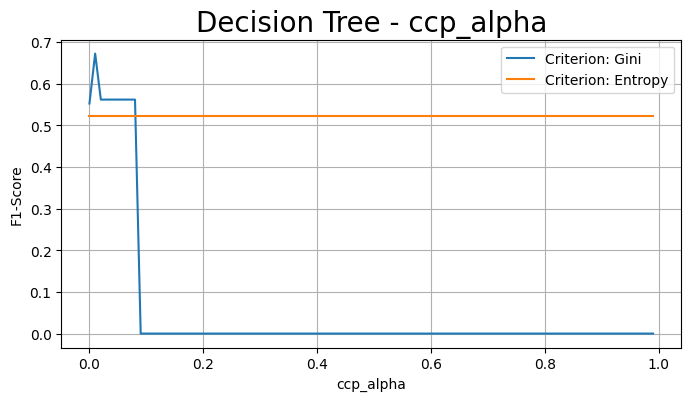

In [482]:
# Definiert eine Reihe von ccp_alpha-Werten
ccp_alphas = np.arange(0, 1, 0.01) 

# Erstellt leere Arrays für die F1-Scores
f1_scores_gini = []
f1_scores_entropy = []

# Schleife, welche die F1-Scores für die ccp_alpha-Werte berechnet
for ccp_alpha in ccp_alphas:
    # Erstellt ein Decision Tree-Modell mit dem aktuellen ccp_alpha-Wert und criterion='gini'
    dt_model = DecisionTreeClassifier(criterion='gini', random_state=29, ccp_alpha=ccp_alpha)

    dt_model.fit(X_train_scaled, y_train)
    y_pred = dt_model.predict(X_test_scaled)
    f1 = f1_score(y_test, y_pred)
    f1_scores_gini.append(f1)


    # Erstellt ein Decision Tree-Modell mit dem aktuellen max_depth-Wert und criterion='entropy'
    dt_model_entropy = DecisionTreeClassifier(max_depth=depth, criterion='entropy', random_state=29)
    
    dt_model_entropy.fit(X_train_scaled, y_train)
    y_pred_entropy = dt_model_entropy.predict(X_test_scaled)
    f1_entropy = f1_score(y_test, y_pred_entropy)
    f1_scores_entropy.append(f1_entropy)

# Finde den besten ccp_alpha-Wert mit dem höchsten F1-Score
ccp_alpha_gini = ccp_alphas[np.argmax(f1_scores_gini)]
ccp_alpha_entropy = ccp_alphas[np.argmax(f1_scores_gini)]

# Plot der F1-Scores über die ccp_alpha-Werte
plt.figure(figsize=(8, 4))
plt.plot(ccp_alphas, f1_scores_gini, label='Criterion: Gini')
plt.plot(ccp_alphas, f1_scores_entropy, label='Criterion: Entropy')
plt.xlabel('ccp_alpha')
plt.ylabel('F1-Score')
plt.title('Decision Tree - ccp_alpha', fontsize=20)
plt.legend()
plt.grid(True)
plt.show()


### Support Vector Machine - rbf

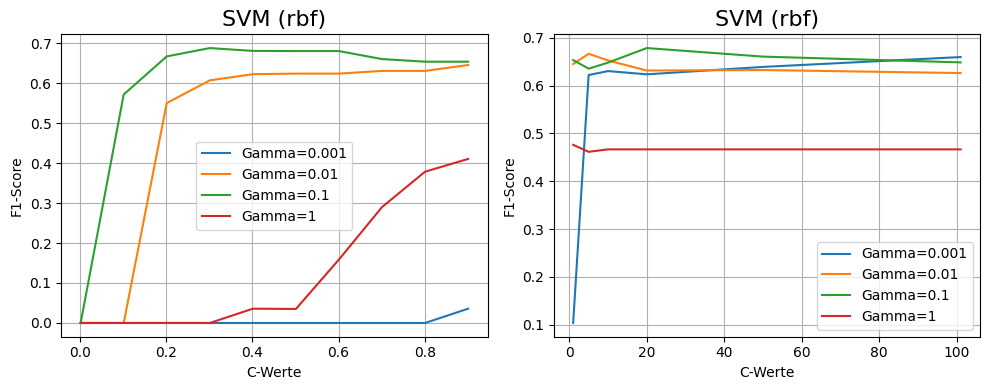

In [483]:
# Definiert eine Reihe von C- und Gamma-Werten
C_Werte = (1, 5, 10, 20, 50, 101)  
C_Werte1 = np.arange(0.001, 1, 0.1)
gamma_Werte = [0.001, 0.01, 0.1, 1]

# Erstellt leeres Array für die F1-Scores
f1_scores = np.zeros((len(C_Werte), len(gamma_Werte)))
f1_scores1 = np.zeros((len(C_Werte1), len(gamma_Werte)))

# Schleife, welche die F1-Scores für die C- und Gamma-Werte berechnet
for i, C in enumerate(C_Werte):
    for j, gamma in enumerate(gamma_Werte): 

        # Erstellt ein SVM-Modell mit kernel='rbf' und den aktuellen Hyperparametern
        svm_model = SVC(kernel='rbf', C=C, gamma=gamma, tol=1E-5)   
        svm_model.fit(X_train_scaled, y_train)      # Trainiert das Modell
        y_pred = svm_model.predict(X_test_scaled)   # Testet das Modell
        f1_scores[i, j] = f1_score(y_test, y_pred)  # Berechnet den F1-Score

# Schleife, welche die F1-Scores für die C- und Gamma-Werte berechnet
for i, C in enumerate(C_Werte1):
    for j, gamma in enumerate(gamma_Werte):

        # Erstelle ein SVM-Modell mit den aktuellen Hyperparametern
        svm_model = SVC(kernel='rbf', C=C, gamma=gamma,tol=1E-5)
        svm_model.fit(X_train_scaled, y_train)
        y_pred = svm_model.predict(X_test_scaled)
        f1_scores1[i, j] = f1_score(y_test, y_pred)

# Plot der F1-Scores über die C-Werte
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

for j in range(len(gamma_Werte)):
    ax2.plot(C_Werte, f1_scores[:, j], label='Gamma={}'.format(gamma_Werte[j]))

for j in range(len(gamma_Werte)):
    ax1.plot(C_Werte1, f1_scores1[:, j], label='Gamma={}'.format(gamma_Werte[j]))

# erstellt Plot 1
ax1.set_xlabel('C-Werte')
ax1.set_ylabel('F1-Score')
ax1.set_title('SVM (rbf)', fontsize=16)
ax1.legend()
ax1.grid(True)

# erstellt Plot 2
ax2.set_xlabel('C-Werte')
ax2.set_ylabel('F1-Score')
ax2.set_title('SVM (rbf)', fontsize=16)
ax2.legend()
ax2.grid(True)

plt.tight_layout() # sorgt dafür, für nicht überlappende Plots
plt.show()

### Support Vector Machine- poly

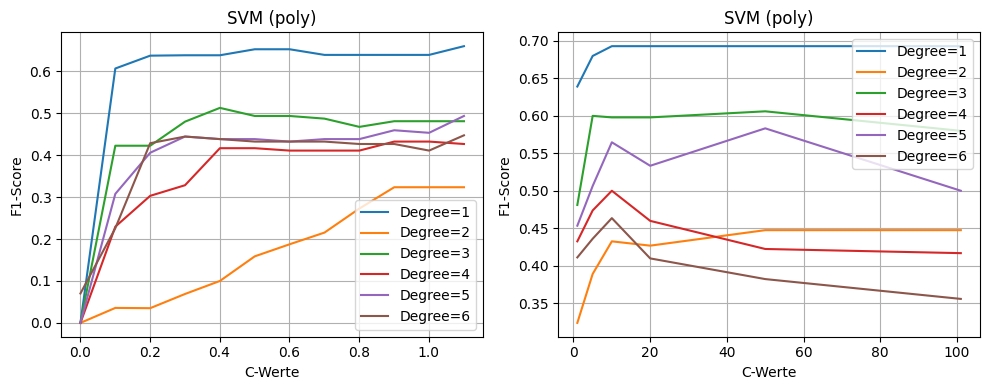

In [484]:
# Definiert eine Reihe von C- und Gamma-Werten
C_Werte = (1,5,10,20,50,101)
Degree_Werte = [1,2,3,4,5,6]
C_Werte1 = np.arange(0.001,1.2 ,0.1)
Degree_Werte1 = [1,2, 3,4, 5, 6]

# Erstelle leere Array für die F1-Scores
f1_scores = np.zeros((len(C_Werte), len(Degree_Werte)))
f1_scores1 = np.zeros((len(C_Werte1), len(Degree_Werte)))

# Schleife, welche die F1-Scores für die C- und Gamma-Werte berechnet
for i, C in enumerate(C_Werte):
    for d, degree in enumerate(Degree_Werte):
        # Erstellt ein SVM-Modell mit dem kernel='poly' und den aktuellen Hyperparametern
        svm_model = SVC(kernel='poly', C=C, degree=degree, tol=1E-5)
        svm_model.fit(X_train_scaled, y_train)
        y_pred = svm_model.predict(X_test_scaled)
        f1_scores[i, d] = f1_score(y_test, y_pred)


for i, C in enumerate(C_Werte1):
    for d, degree in enumerate(Degree_Werte1):
        # Erstelle ein SVM-Modell mit dem kernel='poly' und den aktuellen Hyperparametern
        svm_model = SVC(kernel='poly', C=C, degree=degree, tol=1E-5)
        svm_model.fit(X_train_scaled, y_train)
        y_pred = svm_model.predict(X_test_scaled)
        f1_scores1[i, d] = f1_score(y_test, y_pred)

# Plot mit hoher range
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4)) # erstellt zwei Plots nebeneinander
for d in range(len(Degree_Werte)):
    ax2.plot(C_Werte, f1_scores[:, d], label='Degree={}'.format(Degree_Werte[d]))

# Plot mit niedriger range
for d in range(len(Degree_Werte1)):
    ax1.plot(C_Werte1, f1_scores1[:, d], label='Degree={}'.format(Degree_Werte1[d]))

# Beschriftung für Plot 1
ax1.set_xlabel('C-Werte')
ax1.set_ylabel('F1-Score')
ax1.set_title('SVM (poly)')
ax1.legend()
ax1.grid(True)

# Beschriftung für Plot 2
ax2.set_xlabel('C-Werte')
ax2.set_ylabel('F1-Score')
ax2.set_title('SVM (poly)')
ax2.legend()
ax2.grid(True)
plt.tight_layout() # sorgt dafür, für nicht überlappende Plots
plt.show()

<style> .section-title {background-color: #2ecc71; color: white; border-radius: 15px; text-align: center; padding: 1px; font-size: 2em}</style>
<div class="section-title">Nested Cross Validation</div>

Nested cross-validation enables the selection of the best hyperparameter combination by evaluating the performance of the models on different training and test sets.


In [485]:
# Definiert Anzahl der inneren und äußeren Folds
NUM_TRIALS = 10
NUM_INNER_REPEAT = 10
NUM_INNER_SPLITS = 10
NUM_OUTER_SPLITS = 10

# Definiert die Hyperparameter für die einzelnen Modelle
knn_grid = {"estimator__metric" : ["manhattan", "euclidean"],"estimator__n_neighbors" : [*range(2,21)]}
tree_md_grid = {"estimator__criterion" : ["gini", "entropy"], "estimator__max_depth" : [*range(2,15)]}
tree_ccp_grid = {"estimator__criterion" : ["gini", "entropy"], "estimator__ccp_alpha" : [0.0, 0.001, 0.01, 0.1]}
poly_grid = {"estimator__C": [0.2, 0.6, 1, 20, 50, 70, 90], "estimator__degree" : [1,3]}
rbf_grid = {"estimator__C": [0.3, 0.6,  1, 5, 20, 50, 80], "estimator__gamma" : [0.001, 0.01, 0.1]}
dummy_grid = {"estimator__strategy" : "uniform"}

In [486]:
# Funktion für die Durchführung der GridSearchCV
def get_pipe(estimator): 
    return Pipeline([("scaler", StandardScaler()), ("estimator", estimator)]) # Pipeline-Objekt

In [487]:
# Funktion für die Durchführung der Nested Cross Validation
def nested_cv(estimator, grid, features, targets): 
    start = time.time()                                         # Startzeit der Nested CV
    f1 = np.zeros((NUM_TRIALS, NUM_OUTER_SPLITS))               # Erstellt leere Arrays für die Scores
    precs = np.zeros((NUM_TRIALS, NUM_OUTER_SPLITS))            # Erstellt leere Arrays für die Scores
    rec = np.zeros((NUM_TRIALS, NUM_OUTER_SPLITS))              # Erstellt leere Arrays für die Scores
    accs = np.zeros((NUM_TRIALS, NUM_OUTER_SPLITS))             # Erstellt leere Arrays für die Scores
    fit_times = np.zeros((NUM_TRIALS, NUM_OUTER_SPLITS))        # Erstellt leere Arrays für die Scores
    test_times = np.zeros((NUM_TRIALS, NUM_OUTER_SPLITS))       # Erstellt leere Arrays für die Scores
    
    
    # Schleife für die Durchführung der Nested CV
    for i in range(NUM_TRIALS):
        print(f"Running Outer CV in iteration {i} at {time.time() - start} seconds") # Ausgabe der aktuellen Iteration
        pipe = get_pipe(estimator) # Erstellt Pipeline-Objekt
        inner_cv = RepeatedStratifiedKFold(n_splits=NUM_INNER_SPLITS, n_repeats=NUM_INNER_REPEAT, random_state=i) # Erstellt innere Cross Validation
        outer_cv = StratifiedKFold(n_splits=NUM_OUTER_SPLITS, shuffle=True, random_state=i)                       # Erstellt äußere Cross Validation
        
        
        # Durchführung der GridSearchCV
        clf=GridSearchCV(estimator=pipe, param_grid=grid, cv=inner_cv, scoring=('f1'), n_jobs=8, refit="f1")
        # Durchführung der Nested CV
        cv_results = cross_validate(clf, X=features, y=targets, cv=outer_cv, scoring=("f1", 
                                                                                      "precision",
                                                                                      "recall",
                                                                                      "accuracy"), n_jobs=8)
        
        
        # Speichert Scores in den Arrays
        f1[i] = cv_results["test_f1"] 
        precs[i] = cv_results["test_precision"]
        rec[i] = cv_results["test_recall"]
        accs[i] = cv_results["test_accuracy"]
        fit_times[i] = cv_results["fit_time"]
        test_times[i] = cv_results["score_time"]

    print("total time: ", time.time() - start)             # Ausgabe der Gesamtzeit 
         
    return f1, precs, rec, accs, fit_times, test_times    # Rückgabe der Scores

In [488]:
# Funktion für die Durchführung der CV für das Dummy-Modell
def cross_validate_dummy(estimator, grid, X, y):

    start = time.time() # Startzeit der CV

    # Erstellt leere Arrays für die Scores
    f1 = np.zeros((NUM_TRIALS, NUM_OUTER_SPLITS))
    precs = np.zeros((NUM_TRIALS, NUM_OUTER_SPLITS))
    rec = np.zeros((NUM_TRIALS, NUM_OUTER_SPLITS))
    accs = np.zeros((NUM_TRIALS, NUM_OUTER_SPLITS))
    fit_times = np.zeros((NUM_TRIALS, NUM_OUTER_SPLITS))
    test_times = np.zeros((NUM_TRIALS, NUM_OUTER_SPLITS))

# Schleife für die Durchführung der CV
    for i in range(NUM_TRIALS):
        print(f"Running Outer CV in iteration {i} at {time.time() - start} seconds") # Ausgabe der aktuellen Iteration
        pipe = get_pipe(estimator) # Erstellt Pipeline-Objekt
        
        dummy_clf = DummyClassifier(strategy="uniform") # Erstellt Dummy-Modell

        # Durchführung der CV mit dem Dummy-Modell
        cv_results = cross_validate(dummy_clf, X=X, y=y, cv=10, scoring=("f1", 
                                                                         "precision", 
                                                                         "recall", 
                                                                         "accuracy"), n_jobs=8)
    
        # Speichert Scores in den Arrays
        f1[i] = cv_results["test_f1"]
        precs[i] = cv_results["test_precision"]
        rec[i] = cv_results["test_recall"]
        accs[i] = cv_results["test_accuracy"]
        fit_times[i] = cv_results["fit_time"]
        test_times[i] = cv_results["score_time"]


        print("total time: ", time.time() - start)    # Ausgabe der Gesamtzeit
         
        return f1, precs, rec, accs, fit_times, test_times # Rückgabe der Scores


In [489]:
# Funktion für die Ausgabe der Scores
def add_results(results, Classifier, f1, precs, rec, accs, fit_times, test_times): 
    row = {
        "Classifier" : Classifier,
        "f1_mean" : f1.mean(),
        "f1_std" : f1.std(),
        "f1_min" : f1.min(),
        "f1_max" : f1.max(),
        "prec_mean" : precs.mean(),
        "prec_std" : precs.std(),
        "prec_min" : precs.min(),
        "prec_max" : precs.max(),
        "rec_mean" : rec.mean(),
        "rec_std" : rec.std(),
        "rec_min" : rec.min(),
        "rec_max" : rec.max(),
        "acc_mean" : accs.mean(),
        "acc_std" : accs.std(),
        "acc_min" : accs.min(),
        "acc_max" : accs.max(),
        "fit_mean" : fit_times.mean(),
        "test_mean" : test_times.mean()
        
    }
    return pd.concat([results, pd.DataFrame([row])], ignore_index=True) # Rückgabe der Scores

In [490]:
# Erstellt leeres DataFrame für die Scores
results = pd.DataFrame()

In [491]:
# Führt Nested CV für den Klassefikator kNN durch
kNN = KNeighborsClassifier(weights="distance") # Erstellt kNN-Modell
f1, precs, rec, accs, fit_times, test_times = nested_cv(kNN, knn_grid, X, y)  
results = add_results(results, "kNN", f1, precs, rec, accs, fit_times, test_times) # Speichert Scores in DataFrame

Running Outer CV in iteration 0 at 0.0 seconds
Running Outer CV in iteration 1 at 323.3244903087616 seconds
Running Outer CV in iteration 2 at 641.6542391777039 seconds
Running Outer CV in iteration 3 at 936.605875492096 seconds
Running Outer CV in iteration 4 at 1215.6314432621002 seconds
Running Outer CV in iteration 5 at 1494.2059726715088 seconds
Running Outer CV in iteration 6 at 1780.090134859085 seconds
Running Outer CV in iteration 7 at 2059.2366120815277 seconds
Running Outer CV in iteration 8 at 2339.8234100341797 seconds
Running Outer CV in iteration 9 at 2615.734609603882 seconds
total time:  2893.80744600296


In [492]:
# Führt Nested CV für den Klassefikator Decision Tree (max depth) durch
tree_md = DecisionTreeClassifier(random_state=29) # Erstellt Decision Tree Modell
f1, precs, rec, accs, fit_times, test_times = nested_cv(tree_md, tree_md_grid, X, y) 
results = add_results(results, "tree_md", f1, precs, rec, accs, fit_times, test_times)  # Speichert Scores in DataFrame

Running Outer CV in iteration 0 at 0.001001596450805664 seconds
Running Outer CV in iteration 1 at 192.41672801971436 seconds
Running Outer CV in iteration 2 at 382.9869747161865 seconds
Running Outer CV in iteration 3 at 574.9883985519409 seconds
Running Outer CV in iteration 4 at 764.2720453739166 seconds
Running Outer CV in iteration 5 at 953.7223284244537 seconds
Running Outer CV in iteration 6 at 1133.6224927902222 seconds
Running Outer CV in iteration 7 at 1300.9458434581757 seconds
Running Outer CV in iteration 8 at 1467.8251321315765 seconds
Running Outer CV in iteration 9 at 1634.8002886772156 seconds
total time:  1808.9991924762726


In [493]:
# Führt Nested CV für den Klassefikator Decision Tree (ccp_alpha) durch
tree_ccp = DecisionTreeClassifier(random_state=29) # Erstellt Decision Tree Modell
f1, precs, rec, accs, fit_times, test_times = nested_cv(tree_ccp, tree_ccp_grid, X, y)
results = add_results(results, "tree_ccp", f1, precs, rec, accs, fit_times, test_times) # Speichert Scores in DataFrame

Running Outer CV in iteration 0 at 0.0 seconds


Running Outer CV in iteration 1 at 51.37190079689026 seconds
Running Outer CV in iteration 2 at 103.45401406288147 seconds
Running Outer CV in iteration 3 at 155.08236122131348 seconds
Running Outer CV in iteration 4 at 206.09327030181885 seconds
Running Outer CV in iteration 5 at 257.39508175849915 seconds
Running Outer CV in iteration 6 at 308.93195724487305 seconds
Running Outer CV in iteration 7 at 360.95795464515686 seconds
Running Outer CV in iteration 8 at 413.8204469680786 seconds
Running Outer CV in iteration 9 at 467.36213278770447 seconds
total time:  520.309666633606


In [494]:
# Führt Nested CV für den Klassefikator Support Vector Machine (poly) durch
svm_poly = SVC(kernel="poly") # Erstellt SVM Modell
f1, precs, rec, accs, fit_times, test_times = nested_cv(svm_poly, poly_grid, X, y)
results = add_results(results, "poly_svm", f1, precs, rec, accs, fit_times, test_times)   # Speichert Scores in DataFrame

Running Outer CV in iteration 0 at 0.0 seconds


Running Outer CV in iteration 1 at 517.6366357803345 seconds
Running Outer CV in iteration 2 at 1039.323016166687 seconds
Running Outer CV in iteration 3 at 1567.3648459911346 seconds
Running Outer CV in iteration 4 at 2076.9060142040253 seconds
Running Outer CV in iteration 5 at 2595.0356137752533 seconds
Running Outer CV in iteration 6 at 3121.960392475128 seconds
Running Outer CV in iteration 7 at 3645.610040664673 seconds
Running Outer CV in iteration 8 at 4165.929515361786 seconds
Running Outer CV in iteration 9 at 4687.6817581653595 seconds
total time:  5230.140194892883


In [495]:
# Führt Nested CV für den Klassefikator Support Vector Machine (rbf) durch
svm_rbf = SVC(kernel="rbf") # Erstellt SVM Modell
f1, precs, rec, accs, fit_times, test_times = nested_cv(svm_rbf, rbf_grid, X, y)
results = add_results(results, "svm_rbf", f1, precs, rec, accs, fit_times, test_times)   # Speichert Scores in DataFrame

Running Outer CV in iteration 0 at 0.0 seconds


Running Outer CV in iteration 1 at 286.4475350379944 seconds
Running Outer CV in iteration 2 at 572.0865936279297 seconds
Running Outer CV in iteration 3 at 857.8603041172028 seconds
Running Outer CV in iteration 4 at 1144.9999146461487 seconds
Running Outer CV in iteration 5 at 1434.700436115265 seconds
Running Outer CV in iteration 6 at 1721.1796388626099 seconds
Running Outer CV in iteration 7 at 2006.8095231056213 seconds
Running Outer CV in iteration 8 at 2292.688540458679 seconds
Running Outer CV in iteration 9 at 2578.416933774948 seconds
total time:  2864.6458568573


In [496]:
# Führt cross validation für den Dummy Klassefikator durch
Baseline = DummyClassifier() # Erstellt Dummy Modell
f1, precs, rec, accs, fit_times, test_times = cross_validate_dummy(Baseline, dummy_grid, X, y)
results = add_results(results, "Baseline", f1, precs, rec, accs, fit_times, test_times)  # Speichert Scores in DataFrame

Running Outer CV in iteration 0 at 0.0 seconds
total time:  0.7288610935211182


In [497]:
# Speichert Scores
results

,Classifier,f1_mean,f1_std,f1_min,f1_max,prec_mean,prec_std,prec_min,prec_max,rec_mean,rec_std,rec_min,rec_max,acc_mean,acc_std,acc_min,acc_max,fit_mean,test_mean
0,kNN,0.601552,0.076541,0.324324,0.760000,0.682248,0.087396,0.538462,0.928571,0.545043,0.090062,0.222222,0.740741,0.750376,0.043343,0.675325,0.844156,179.921549,0.067222
1,tree_md,0.630259,0.073327,0.452830,0.840000,0.609601,0.082019,0.461538,0.913043,0.665698,0.113420,0.423077,0.888889,0.729800,0.051812,0.623377,0.896104,116.030560,0.050121
2,tree_ccp,0.639135,0.075464,0.454545,0.842105,0.617531,0.080182,0.459459,0.826087,0.677920,0.123374,0.384615,0.961538,0.736198,0.052437,0.610390,0.883117,32.813718,0.023059
3,poly_svm,0.623708,0.075300,0.416667,0.836364,0.717022,0.085152,0.454545,0.941176,0.558832,0.092346,0.370370,0.851852,0.767042,0.042687,0.631579,0.883117,353.740602,0.100051
4,svm_rbf,0.606237,0.072869,0.390244,0.836364,0.698365,0.083286,0.454545,0.944444,0.541709,0.086596,0.296296,0.851852,0.756629,0.040761,0.631579,0.883117,193.450066,0.105481
5,Baseline,0.038397,0.118572,0.000000,0.515152,0.033157,0.102833,0.000000,0.466667,0.046225,0.143190,0.000000,0.629630,0.048154,0.146947,0.000000,0.623377,0.000321,0.002069


<style> .section-title {background-color: #2ecc71; color: white; border-radius: 15px; text-align: center; padding: 1px; font-size: 2em}</style>
<div class="section-title">Final Model</div>

In [502]:
# Funktion, welche Produktionsmodell trainiert
def train_prod_model(estimator, grid):
    pipe = get_pipe(estimator) # Erstellt Pipeline-Objekt
    cv = RepeatedStratifiedKFold(n_splits=NUM_INNER_SPLITS, n_repeats=NUM_INNER_REPEAT, random_state=29) # Erstellt CV-Objekt
    clf = GridSearchCV(estimator=pipe, param_grid=grid, cv=cv, n_jobs=8) # Erstellt GridSearchCV-Objekt
    clf.fit(X, y) # Trainiert Modell
    return clf # Rückgabe des Modells

In [503]:
# Gib die besten Parameter und das beste Modell für den Decision Tree (ccp_alpha) aus
clf = train_prod_model(tree_ccp, tree_ccp_grid)
print(clf.best_params_)
print(clf.best_estimator_)

{'estimator__ccp_alpha': 0.01, 'estimator__criterion': 'gini'}
Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator',
                 DecisionTreeClassifier(ccp_alpha=0.01, random_state=29))])


In [506]:
# Speichert das Modell als pickle-Datei
save_model = joblib.dump(clf, "final_model.pkl")

<style> .section-title {background-color: #2ecc71; color: white; border-radius: 15px; text-align: center; padding: 1px; font-size: 2em}</style>
<div class="section-title">Conclusion</div>

The results demonstrate that the Decision Trees (ccp_alpha & max_depth) perform the best, with an average F1-score of 63%. The Support Vector Machine (polynomial kernel) achieves a value of 62%. The kNearestNeighbor and the Support Vector Machine (rbf) achieve a performance of 60%. 